Tutorial from datacamp [URL](https://www.datacamp.com/community/tutorials/wordcloud-python)

In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from scipy.ndimage import zoom, gaussian_filter

from wordcloud import WordCloud, STOPWORDS as stopwords, ImageColorGenerator

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/winemag-data-130k-v2.csv", index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
print("There are {} observations and {} features in this dataset. \n".format(
    df.shape[0],
    df.shape[1]))

print("There are {} types of wine in this dataset such as {}... \n".format(
    len(df.variety.unique()),
    ", ".join(df.variety.unique()[0:5])
    ))

print("There are {} countries producing wine in this dataset such as {}... \n".format(
    len(df.country.unique()),
    ", ".join(df.country.unique()[0:5])
    ))

There are 129971 observations and 13 features in this dataset. 

There are 708 types of wine in this dataset such as White Blend, Portuguese Red, Pinot Gris, Riesling, Pinot Noir... 

There are 44 countries producing wine in this dataset such as Italy, Portugal, US, Spain, France... 



In [4]:
df[["country", "description", "points"]].head()

,country,description,points
0,Italy,"Aromas include tropical fruit, broom, brimston...",87
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87
2,US,"Tart and snappy, the flavors of lime flesh and...",87
3,US,"Pineapple rind, lemon pith and orange blossom ...",87
4,US,"Much like the regular bottling from 2012, this...",87


In [5]:
country = df.groupby("country")
country.describe().head()

points                                                 \
                         count       mean       std   min    25%   50%    75%   
country                                                                         
Argentina               3800.0  86.710263  3.179627  80.0  84.00  87.0  89.00   
Armenia                    2.0  87.500000  0.707107  87.0  87.25  87.5  87.75   
Australia               2329.0  88.580507  2.989900  80.0  87.00  89.0  91.00   
Austria                 3345.0  90.101345  2.499799  82.0  88.00  90.0  92.00   
Bosnia and Herzegovina     2.0  86.500000  2.121320  85.0  85.75  86.5  87.25   

                                price                                     \
                          max   count       mean        std   min    25%   
country                                                                    
Argentina                97.0  3756.0  24.510117  23.430122   4.0  12.00   
Armenia                  88.0     2.0  14.500000   0.707107  14.0  14.25   
Australia               100.0  2294.0  35.437663  49.049458   5.0  15.00   
Austria                  98.0  2799.0  30.762772  27.224797   7.0  18.00   
Bosnia and Herzegovina   88.0     2.0  12.500000   0.707107  12.0  12.25   

                                             
                         50%    75%     max  
country                                      
Argentina               17.0  25.00   230.0  
Armenia                 14.5  14.75    15.0  
Australia               21.0  38.00   850.0  
Austria                 25.0  36.50  1100.0  
Bosnia and Herzegovina  12.5  12.75    13.0

In [6]:
country.mean().sort_values(by="points", ascending=False).head()

,points,price
country,,
England,91.581081,51.681159
India,90.222222,13.333333
Austria,90.101345,30.762772
Germany,89.851732,42.257547
Canada,89.369650,35.712598


# Word Cloud

In [7]:
text = df.description[0]
text

"Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity."

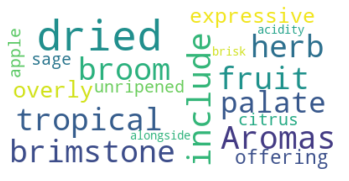

In [8]:
wordcloud = WordCloud(
    max_font_size=50,
    max_words=100,
    background_color="white"
).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [9]:
text = " ".join(review for review in df.description)
print ("There are {} words in the combination of all review.".format(len(text)))

There are 31661073 words in the combination of all review.


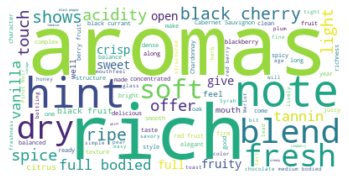

In [10]:
stopwords = set(stopwords)
stopwords.update(["drink", "now", "wine", "flavor", "flavors", "finish", "palate", "aroma", "nose", "show"])

wordcloud = WordCloud(
    stopwords=stopwords,
    # max_font_size=50,
    max_words=100,
    background_color="white"
).generate(text)

plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

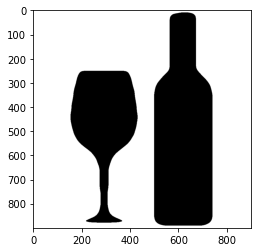

In [11]:
wine_mask = np.array(Image.open("data/winemask.png"))


wine_mask[wine_mask == 0] = 255
wine_mask[wine_mask != 255] = 0

wine_mask = zoom(wine_mask, 4, order=3)
wine_mask = gaussian_filter(wine_mask, sigma=(10), order=0)

wine_mask[wine_mask <= 128] = 0
wine_mask[wine_mask > 128] = 255

plt.imshow(wine_mask, cmap="gray")

In [12]:
wc = WordCloud(
    background_color="white",
    max_words=1000,
    mask=wine_mask,
    stopwords=stopwords,
    contour_width=3,
    contour_color="firebrick"
)

wc.generate(text)


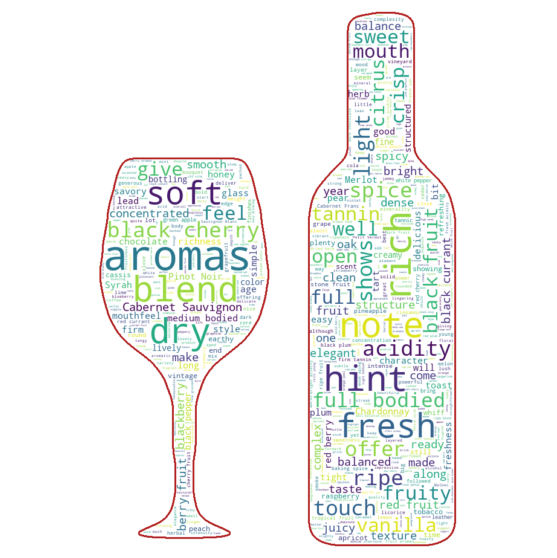

In [13]:
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()